In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New section

# New section

In [ ]:
data_group2 = pd.read_json('/content/All_Beauty_5.json',lines=True)
print(data_group2.head(5))

   overall  verified   reviewTime      reviewerID        asin  \
0        5      True   09 1, 2016  A3CIUOJXQ5VDQ2  B0000530HU   
1        5      True  11 14, 2013  A3H7T87S984REU  B0000530HU   
2        1      True  08 18, 2013  A3J034YH7UG4KT  B0000530HU   
3        5     False   05 3, 2011  A2UEO5XR3598GI  B0000530HU   
4        5      True   05 6, 2011  A3SFRT223XXWF7  B00006L9LC   

                                               style     reviewerName  \
0  {'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...         Shelly F   
1  {'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...     houserules18   
2  {'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...             Adam   
3  {'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...           Rich K   
4                          {'Size:': ' 200ml/6.7oz'}  C. C. Christian   

                                          reviewText  \
0                   As advertised. Reasonably priced   
1  Like the oder and the feel when I put it on my...   
2 

In [ ]:
print(data_group2.shape)

(5269, 12)


In [ ]:
print(data_group2['asin'].value_counts())

B0012Y0ZG2    1794
B000URXP6E     858
B001OHV1H4     489
B00006L9LC     489
B0009RF9DW     392
              ... 
B00B7V273E       1
B01DKQAXC0       1
B00MGK9Z8U       1
B0091OCA86       1
B00GHJOM2U       1
Name: asin, Length: 85, dtype: int64


In [ ]:
 # Number of Reviews per Product
review_counts = data_group2.groupby(['asin'])['reviewerID'].count()
print(review_counts)

asin
B0000530HU      4
B00006L9LC    489
B00021DJ32      3
B0002JHI1I      2
B0006O10P4      6
             ... 
B019V2KYZS      6
B01BNEYGQU     13
B01DKQAXC0      1
B01DLR9IDI     21
B01E7UKR38     23
Name: reviewerID, Length: 85, dtype: int64


In [ ]:

# Number of Reviews across Products
overall_counts = data_group2.groupby(['asin','overall'],sort=True)['reviewerID'].count()
print(overall_counts)

asin        overall
B0000530HU  1           1
            5           3
B00006L9LC  1          17
            2           5
            3           3
                       ..
B01DKQAXC0  5           1
B01DLR9IDI  5          21
B01E7UKR38  3           3
            4           7
            5          13
Name: reviewerID, Length: 192, dtype: int64


In [ ]:
# Number of Reviews per User
user_counts = data_group2.groupby(['asin','reviewerID'])['reviewerName'].count()
print(user_counts)

asin        reviewerID    
B0000530HU  A2UEO5XR3598GI    1
            A3CIUOJXQ5VDQ2    1
            A3H7T87S984REU    1
            A3J034YH7UG4KT    1
B00006L9LC  A10ZJZNO4DAVB     1
                             ..
B01E7UKR38  A7C77J4MH94B6     1
            A914TQVHI872U     1
            AKMEY1BSHSDG7     1
            AOTMP0OKJOUWI     1
            ARARUVZ8RUF5T     1
Name: reviewerName, Length: 4092, dtype: int64


In [ ]:
print('Number of Distinct Products: ',data_group2['asin'].nunique())
print('Number of Distinct Users: ', data_group2['reviewerID'].nunique())
print('Number of Distinct User Names: ', data_group2['reviewerName'].nunique())

Number of Distinct Products:  85
Number of Distinct Users:  991
Number of Distinct User Names:  905


In [ ]:
type(data_group2['reviewText'])

pandas.core.series.Series

In [ ]:
reviews_len = data_group2['reviewText'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
summary_len = data_group2['summary'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

In [ ]:
# Getiing the average of that
average_reviews_len = reviews_len.mean()
average_summary_len = summary_len.mean()

print(average_reviews_len)
print(average_summary_len)

37.54545454545455
4.152590624406908


In [ ]:
metadata = pd.read_json('/content/meta_All_Beauty.json', lines=True)

print(metadata.head(5))

FileNotFoundError: ignored

In [ ]:
merged_data = pd.merge(data_group2, metadata[['asin', 'title']], on='asin', how='left')

# Convert the 'reviewTime' column to datetime format
merged_data['reviewTime'] = pd.to_datetime(merged_data['reviewTime'])

# Set the 'reviewTime' column as the index
merged_data.set_index('reviewTime', inplace=True)

# Resample the data by month and count the number of reviews
reviews_per_month = merged_data.groupby(['title', pd.Grouper(freq='M')]).size()

In [ ]:
# Group the data by 'asin' and count the number of reviews
product_reviews = merged_data.groupby('title').size()

# Find the product with the most reviews
most_reviewed_product = product_reviews.idxmax()

print("The most reviewed product is: ", most_reviewed_product)

In [ ]:
product_data = reviews_per_month[most_reviewed_product]

In [ ]:
print(product_data)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(product_data.index, product_data.values)
ax.set(title=f'Reviews per Month for "{most_reviewed_product}"', xlabel='year', ylabel='Number of Reviews')
plt.show()

In [ ]:
product_reviews = merged_data.groupby('title')['reviewerID'].count()

top5_products = product_reviews.nlargest(5)
for title , product in top5_products.items():
  print("The most reviewed product is: ", title ,"with",product ,"reviews")

In [ ]:
# Randomly choosing a sample of data for text preprocessing
sample_df = data_group2.sample(n=830)


In [ ]:
sample_df.columns.values

array(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image'], dtype=object)

In [ ]:
# Labelling the rating based on the overall

def label_data(rating):
    if(rating in [4,5]):
        return 'Positive'
    elif(rating == 3):
        return 'Neutral'
    else:
        return 'Negative'

In [ ]:
sample_df['Rating of Product']=sample_df['overall']

In [ ]:
sample_df['rating'] = sample_df['Rating of Product'].apply(label_data)

In [ ]:
# we do not need the columns below because they do not in any way help in the analysis.
print(sample_df.columns.values)
sample_df = sample_df.drop(columns=['unixReviewTime','overall','reviewerName','reviewTime'])
print(sample_df.columns.values)

['overall' 'verified' 'reviewTime' 'reviewerID' 'asin' 'style'
 'reviewerName' 'reviewText' 'summary' 'unixReviewTime' 'vote' 'image'
 'Rating of Product' 'rating']
['verified' 'reviewerID' 'asin' 'style' 'reviewText' 'summary' 'vote'
 'image' 'Rating of Product' 'rating']


In [ ]:
sample_df['review_len'] = sample_df['reviewText'].apply(lambda x: len(x.split())if isinstance(x, str) else 0)
sample_df['Rating of Product'].value_counts()

5    733
4     54
1     16
3     15
2     12
Name: Rating of Product, dtype: int64

In [ ]:
positive_words = pd.read_csv('/content/positive-words.txt',sep="\t",encoding='latin1',header=None)
negative_words = pd.read_csv('/content/negative-words.txt',sep="\t",encoding='latin1',header=None)


In [ ]:
positive_words.columns = ["words"]
negative_words.columns = ["words"]

In [ ]:
pos_set = set(list(positive_words["words"]))
neg_set = set(list(negative_words["words"]))
print (len(pos_set))
print (len(neg_set))

In [ ]:
sample_df['review_processed_docs'] = [doc.lower().replace(".", "") if isinstance(doc, str) else "" for doc in sample_df['reviewText']]
print(sample_df)


      verified      reviewerID        asin  \
5265      True   AUX122XW8ONG6  B01DLR9IDI   
766      False  A1S44RIBM0ZD9U  B0009RF9DW   
2070      True   ADNBIWDCIZJ0S  B000URXP6E   
2731      True  A35LFTGC7TO48F  B0012Y0ZG2   
1512      True  A25NX4BU2GD908  B000URXP6E   
...        ...             ...         ...   
3592      True   AIF4UQ6O6UZZF  B0012Y0ZG2   
2180     False  A3S3R88HA0HZG3  B0010ZBORW   
1999      True   ASZB0F9PAQL5J  B000URXP6E   
4525      True  A193RG4GIJ5OLM  B001OHV1H4   
3359      True   AIQ0ABOHK58F6  B0012Y0ZG2   

                                   style  \
5265      {'Design:': ' ETA-7117EE3788'}   
766            {'Size:': ' 13.5 Fl.Oz.'}   
2070                   {'Size:': ' 370'}   
2731                   {'Size:': ' 281'}   
1512            {'Size:': ' 11 fl. oz.'}   
...                                  ...   
3592                    {'Size:': ' 99'}   
2180  {'Color:': ' Moisturizing Gloves'}   
1999                    {'Size:': ' 65'}   
4525   

In [ ]:
print(sample_df['review_processed_docs'])

5265                       i absolutely love this eye gel
766     i purchased this lotion in december 2013 while...
2070    in my opinion any product by decleor is going ...
2731    i received my order on time, and the products ...
1512                                  very nice fragrance
                              ...                        
3592                                        great shampoo
2180    these urban spa moisturizing gloves are a very...
1999    i really enjoy this product they started selli...
4525          love it makes my hair just lovely and curly
3359    very happy with my first time using it my hair...
Name: review_processed_docs, Length: 830, dtype: object


# New section

In [ ]:
sample_df['review_processed_docs_1']=sample_df['review_processed_docs']

In [ ]:
sample_df['review_processed_doc_ML'] = sample_df['review_processed_docs']

In [ ]:
sample_df['review_processed_doc_ML'] = sample_df['summary'] + ' ' + sample_df['reviewText']

In [ ]:
print(sample_df.columns.values)


['verified' 'reviewerID' 'asin' 'style' 'reviewText' 'summary' 'vote'
 'image' 'Rating of Product' 'rating' 'review_len' 'review_processed_docs'
 'review_processed_docs_1' 'review_processed_doc_ML']


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stopwords = set(stopwords.words("english"))

In [ ]:
print(stopwords)

{'its', 'during', 'which', 'up', 'under', 'you', 'will', 'don', 'haven', 'she', 'when', 'can', 'ma', 'through', 'has', "didn't", "won't", 'me', 'ourselves', 'it', 'll', 'out', 'were', 'what', 'ain', 'hers', 're', 'needn', 'a', 'his', "aren't", 'should', 'only', "you'll", 'other', 'there', 'or', 'ours', 'of', 'shouldn', 'was', 'before', "that'll", 'having', 'didn', 'her', 'at', "shan't", 'o', 'wasn', 'is', 'into', 'further', 'this', 'by', 'd', 'more', "mustn't", "don't", 'theirs', 'these', 'than', 'over', 'nor', 'now', 'to', 'couldn', "mightn't", "doesn't", 'again', 'all', 'once', 'i', 'very', 'myself', 'about', 'against', 'am', "hadn't", "wasn't", 'because', 'their', 'few', 'and', 'with', 'where', 'both', "should've", 'not', 'have', 'mustn', 'from', 'who', 'while', 'but', 'some', 'y', 'did', 'if', 'after', 'most', "couldn't", 'too', 'isn', 'on', 'each', 'my', 'they', 'off', 'aren', 'how', 'himself', 'so', 'own', 'we', 'm', 'above', "you've", "shouldn't", 'in', 'doesn', 'here', 'just', 

In [ ]:
type(stopwords)

set

In [ ]:
stopwords_negative = {"won't",'wouldn','isn',"wouldn't",'no','didn','wasn','nor','not',"wasn't","couldn't","mightn't","mustn't","doesn't","weren't","didn't","shouldn't",'doesn','against','hadn',"haven't",'couldn','mustn',"aren't","hasn't","shan't","don't", "hadn't", "isn't","needn't"}

In [ ]:
stopwords2 = stopwords - stopwords_negative
#stopwords.discard('never')

In [ ]:
print(stopwords2)

{'its', 'during', 'which', 'up', 'under', 'you', 'will', 'don', 'haven', 'she', 'when', 'can', 'ma', 'through', 'has', 'me', 'ourselves', 'it', 'll', 'out', 'were', 'what', 'ain', 'hers', 're', 'needn', 'a', 'his', 'should', 'only', "you'll", 'other', 'there', 'or', 'ours', 'of', 'shouldn', 'was', 'before', "that'll", 'having', 'her', 'at', 'o', 'is', 'into', 'further', 'this', 'by', 'd', 'more', 'theirs', 'these', 'than', 'over', 'now', 'to', 'again', 'all', 'once', 'i', 'very', 'myself', 'about', 'am', 'because', 'their', 'few', 'and', 'with', 'where', 'both', "should've", 'have', 'from', 'who', 'while', 'but', 'some', 'y', 'did', 'if', 'after', 'most', 'too', 'on', 'each', 'my', 'they', 'off', 'aren', 'how', 'himself', 'so', 'own', 'we', 'm', 'above', "you've", 'in', 'here', 'just', 'are', 'do', 'had', 'mightn', 'as', 'below', 'shan', 'the', 'does', "you're", 'our', 'any', 'itself', "you'd", 'yourself', 'themselves', 'been', 'why', 'same', 'down', 't', 's', 'won', 've', 'that', 'tho

In [ ]:
sample_df['review_processed_docs']

5265                       i absolutely love this eye gel
766     i purchased this lotion in december 2013 while...
2070    in my opinion any product by decleor is going ...
2731    i received my order on time, and the products ...
1512                                  very nice fragrance
                              ...                        
3592                                        great shampoo
2180    these urban spa moisturizing gloves are a very...
1999    i really enjoy this product they started selli...
4525          love it makes my hair just lovely and curly
3359    very happy with my first time using it my hair...
Name: review_processed_docs, Length: 830, dtype: object

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
sample_df['review_processed_docs'] = sample_df['review_processed_docs'].apply(lambda x: word_tokenize(str(x)))

In [ ]:
print(sample_df['review_processed_docs'])

5265                [i, absolutely, love, this, eye, gel]
766     [i, purchased, this, lotion, in, december, 201...
2070    [in, my, opinion, any, product, by, decleor, i...
2731    [i, received, my, order, on, time, ,, and, the...
1512                              [very, nice, fragrance]
                              ...                        
3592                                     [great, shampoo]
2180    [these, urban, spa, moisturizing, gloves, are,...
1999    [i, really, enjoy, this, product, they, starte...
4525    [love, it, makes, my, hair, just, lovely, and,...
3359    [very, happy, with, my, first, time, using, it...
Name: review_processed_docs, Length: 830, dtype: object


In [ ]:
sample_df['review_processed_docs'] = sample_df['review_processed_docs'].apply(lambda doc: [word for word in doc if word not in stopwords2])

In [ ]:
print(sample_df['review_processed_docs'])

5265                         [absolutely, love, eye, gel]
766     [purchased, lotion, december, 2013, christmas,...
2070    [opinion, product, decleor, going, improve, sk...
2731    [received, order, time, ,, products, not, brok...
1512                                    [nice, fragrance]
                              ...                        
3592                                     [great, shampoo]
2180    [urban, spa, moisturizing, gloves, effective, ...
1999    [really, enjoy, product, started, selling, loc...
4525                   [love, makes, hair, lovely, curly]
3359        [happy, first, time, using, hair, manageable]
Name: review_processed_docs, Length: 830, dtype: object


In [ ]:
## TF-IDF Text Representation

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)
bow_rep_tfidf = tfidf.fit_transform(sample_df['review_processed_docs'].apply(lambda x: ' '.join(x)))

In [ ]:
#IDF for all words in the vocabulary
print("IDF for all words in the vocabulary",tfidf.idf_)

IDF for all words in the vocabulary [7.02948261 6.62401751 5.52540522 ... 5.77671965 6.62401751 6.62401751]


In [ ]:
#All words in the vocabulary.
print("All words in the vocabulary",tfidf.vocabulary_)

All words in the vocabulary {'absolutely': 70, 'love': 1462, 'eye': 1002, 'gel': 1143, 'purchased': 1977, 'lotion': 1459, 'december': 748, '2013': 29, 'christmas': 510, 'shopping': 2327, 'fell': 1041, 'right': 2152, 'away': 241, 'nicest': 1649, 'scented': 2222, 'body': 355, 've': 2834, 'found': 1113, 'many': 1487, 'years': 2988, 'adore': 102, 'let': 1419, 'female': 1043, 'friend': 1125, 'mine': 1545, 'try': 2763, 'told': 2713, 'front': 1130, 'not': 1663, 'ask': 220, 'one': 1709, 'item': 1353, 'would': 2975, 'giving': 1158, 'trying': 2764, 'use': 2816, 'sparingly': 2459, 'quickly': 1998, 'sadly': 2190, 'returned': 2135, 'store': 2537, 'anymore': 180, 'time': 2695, 'visit': 2853, 'always': 149, 'check': 493, 'see': 2254, 'wonderful': 2954, 'come': 584, 'far': 1024, 'price': 1926, 'much': 1603, 'less': 1418, 'sold': 2426, 'amazoncom': 154, 'continue': 645, 'comes': 586, 'keep': 1366, 'mind': 1544, 'order': 1727, 'amazon': 153, 'although': 148, 'cost': 665, 'make': 1477, 'regular': 2073, '

In [ ]:
#TFIDF representation for all documents in our corpus 
print("TFIDF representation for all documents in our corpus\n",bow_rep_tfidf.toarray()) 

TFIDF representation for all documents in our corpus
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
## Word2Vec Text Representation

from gensim.models import Word2Vec

In [ ]:
corpus = sample_df['review_processed_docs']


In [ ]:
model_cbow = Word2Vec(corpus, min_count=1,sg=0)
print(model_cbow)

Word2Vec<vocab=3282, vector_size=100, alpha=0.025>


In [ ]:
print( model_cbow.wv['cheap'].reshape((1, 100)))
print("Similarity between soap and wash:",model_cbow.wv.similarity('cheap', 'wash'))

[[-0.0036022   0.02305063  0.00800765  0.00772989 -0.00705348 -0.02503956
   0.00925646  0.04537167 -0.00300119 -0.02074742 -0.00240377 -0.03390849
   0.00325015  0.00971337 -0.00408874 -0.02655994  0.00632287 -0.01556521
   0.00179574 -0.05127418  0.02060744  0.0053596   0.02076621 -0.00401419
  -0.01398437 -0.00951659 -0.01355379 -0.00768408 -0.01312284  0.00262024
   0.02458528  0.01370976  0.00971246 -0.01531946  0.00111034  0.00426238
   0.01352367 -0.01226133 -0.01559325 -0.03443518 -0.01021666 -0.01999273
  -0.02124808 -0.01491421  0.01070641 -0.00919553 -0.02194427  0.00451554
   0.00756538  0.01560408 -0.00625432 -0.00453946 -0.0116874  -0.00940927
  -0.02383752  0.00744435  0.00502004  0.00269348 -0.02822048  0.01527336
   0.00722241  0.00214338 -0.00867392 -0.01013165 -0.02042264  0.00529684
  -0.00768698  0.01916315 -0.02075909  0.03375373 -0.0154139   0.0051148
   0.01842043 -0.0115157   0.01925611  0.00377739  0.00428005 -0.01671804
  -0.01861094 -0.00362461 -0.01546143 -

In [ ]:
!pip install vaderSentiment


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.0 MB/s eta 0:00:00


In [ ]:

##Sentiment Analysis created using VADER


In [ ]:
sample_df['review_processed_docs'] = sample_df['review_processed_docs'].apply(lambda x: ' '.join(x))
print(sample_df['review_processed_docs'])

5265                              absolutely love eye gel
766     purchased lotion december 2013 christmas shopp...
2070    opinion product decleor going improve skin ! !...
2731    received order time , products not broken afra...
1512                                       nice fragrance
                              ...                        
3592                                        great shampoo
2180    urban spa moisturizing gloves effective way mo...
1999    really enjoy product started selling local sto...
4525                         love makes hair lovely curly
3359               happy first time using hair manageable
Name: review_processed_docs, Length: 830, dtype: object


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sa = SentimentIntensityAnalyzer()

for statements in sample_df['review_processed_docs_1']:
    print(f'For statement : "{statements}"')
    print("-------------------------------------------------")
    polar = sa.polarity_scores(statements)
    positive = polar["pos"]
    neutral = polar["neu"]
    negative = polar["neg"]
    compound = polar['compound']
    
    print(f'The % of positive sentiment in :-- "{statements}" is : {round(positive*100,2)} %')
    print("-------------------------------------------------")
    print(f'The % of neutral sentiment in :-- "{statements}" is : {round(neutral*100,2)} %')
    print("-------------------------------------------------")
    print(f'The % of Compound sentiment in :-- "{statements}" is : {round(compound*100,2)} %')
    print("-------------------------------------------------")
    print(f'The % of negative sentiment in :-- "{statements}" is : {round(negative*100,2)} %')
    print("-------------------------------------------------")
    print("-"*30)

Streaming output truncated to the last 5000 lines.
For statement : "purchased this product after researching products to help my son with his three year old daughters naturally curly blonde hair the baby shampoos he had used were drying her hair out, and most of the detanglers weighted down her curls too much started using this product along with the dark and lovely beautiful beginnings deep conditioner and her hair is more manageable, not dried out, and has the natural bouncy curls that are adorable"
-------------------------------------------------
The % of positive sentiment in :-- "purchased this product after researching products to help my son with his three year old daughters naturally curly blonde hair the baby shampoos he had used were drying her hair out, and most of the detanglers weighted down her curls too much started using this product along with the dark and lovely beautiful beginnings deep conditioner and her hair is more manageable, not dried out, and has the natural 

In [ ]:
!pip install vaderSentiment

In [ ]:
import vaderSentiment.vaderSentiment
vader = vaderSentiment.vaderSentiment.SentimentIntensityAnalyzer()
sample_df['vader_sentiment_polarity'] = sample_df['review_processed_docs_1'].apply(lambda tweet: vader.polarity_scores(tweet))

sample_df['compound']  = sample_df['vader_sentiment_polarity'].apply(lambda score_dict: score_dict['compound'])

def score(compound):
  if compound >= 0.05 :
    return 'Positive'
 
  elif compound <= - 0.05 :
    return 'Negative'
 
  else :
    return 'Neutral'

sample_df['vader_tag'] = sample_df['compound'].apply(score)

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sa = SentimentIntensityAnalyzer()

for statements in sample_df['review_processed_docs']:
    print(f'For statement : "{statements}"')
    print("-------------------------------------------------")
    polar = sa.polarity_scores(statements)
    positive = polar["pos"]
    neutral = polar["neu"]
    negative = polar["neg"]
    compound = polar['compound']
    
    print(f'The % of positive sentiment in :-- "{statements}" is : {round(positive*100,2)} %')
    print("-------------------------------------------------")
    print(f'The % of neutral sentiment in :-- "{statements}" is : {round(neutral*100,2)} %')
    print("-------------------------------------------------")
    print(f'The % of Compound sentiment in :-- "{statements}" is : {round(compound*100,2)} %')
    print("-------------------------------------------------")
    print(f'The % of negative sentiment in :-- "{statements}" is : {round(negative*100,2)} %')
    print("-------------------------------------------------")
    print("-"*30)

Streaming output truncated to the last 5000 lines.
-------------------------------------------------
The % of Compound sentiment in :-- "thanks" is : 44.04 %
-------------------------------------------------
The % of negative sentiment in :-- "thanks" is : 0.0 %
-------------------------------------------------
------------------------------
For statement : "product unavailable time happy find amazon used years thymes discontinued told special `` edition '' released last christmas , hope year , order gifts available"
-------------------------------------------------
The % of positive sentiment in :-- "product unavailable time happy find amazon used years thymes discontinued told special `` edition '' released last christmas , hope year , order gifts available" is : 34.4 %
-------------------------------------------------
The % of neutral sentiment in :-- "product unavailable time happy find amazon used years thymes discontinued told special `` edition '' released last christmas , hope 

In [ ]:
## Sentiment Analysis using TextBlob

In [ ]:
import re

In [ ]:
sample_df['review_processed_docs'] = sample_df['review_processed_docs'].apply(lambda x: re.sub(r'[^\w\s\']', '', x))

In [ ]:
pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from textblob import TextBlob
sample_df['Sentiment_polarity'] = sample_df['review_processed_docs'].apply(lambda x: TextBlob(x).sentiment.polarity)
print(sample_df['Sentiment_polarity'])

sample_df.loc[sample_df.Sentiment_polarity==0.0,"textblob_tag"]="Neutral"
sample_df.loc[sample_df.Sentiment_polarity>0.0,"textblob_tag"]="Positive"
sample_df.loc[sample_df.Sentiment_polarity<0.0,"textblob_tag"]="Negative"

sample_df.head()

5265    0.500000
766     0.219913
2070    0.430000
2731   -0.050000
1512    0.600000
          ...   
3592    0.800000
2180    0.080556
1999    0.425000
4525    0.500000
3359    0.525000
Name: Sentiment_polarity, Length: 830, dtype: float64


,verified,reviewerID,asin,style,reviewText,summary,vote,image,Rating of Product,rating,review_len,review_processed_docs,review_processed_docs_1,review_processed_doc_ML,vader_sentiment_polarity,compound,vader_tag,Sentiment_polarity,textblob_tag
5265,True,AUX122XW8ONG6,B01DLR9IDI,{'Design:': ' ETA-7117EE3788'},I absolutely love this eye gel.,As advertised,NaN,NaN,5,Positive,6,absolutely love eye gel,i absolutely love this eye gel,As advertised I absolutely love this eye gel.,"{'neg': 0.0, 'neu': 0.527, 'pos': 0.473, 'comp...",0.6697,Positive,0.500000,Positive
766,False,A1S44RIBM0ZD9U,B0009RF9DW,{'Size:': ' 13.5 Fl.Oz.'},I purchased this lotion in December 2013 while...,Hammam El Hana Argan Therapy Egyptian White Mu...,3,NaN,5,Positive,181,purchased lotion december 2013 christmas shopp...,i purchased this lotion in december 2013 while...,Hammam El Hana Argan Therapy Egyptian White Mu...,"{'neg': 0.03, 'neu': 0.828, 'pos': 0.142, 'com...",0.9750,Positive,0.219913,Positive
2070,True,ADNBIWDCIZJ0S,B000URXP6E,{'Size:': ' 370'},In my opinion any product by Decleor is going ...,heaven,NaN,NaN,5,Positive,22,opinion product decleor going improve skin h...,in my opinion any product by decleor is going ...,heaven In my opinion any product by Decleor is...,"{'neg': 0.0, 'neu': 0.665, 'pos': 0.335, 'comp...",0.8619,Positive,0.430000,Positive
2731,True,A35LFTGC7TO48F,B0012Y0ZG2,{'Size:': ' 281'},"I received my order on time, and the products ...","I received my order on time, and the products ...",NaN,NaN,4,Positive,25,received order time products not broken afrai...,"i received my order on time, and the products ...","I received my order on time, and the products ...","{'neg': 0.0, 'neu': 0.701, 'pos': 0.299, 'comp...",0.8557,Positive,-0.050000,Negative
1512,True,A25NX4BU2GD908,B000URXP6E,{'Size:': ' 11 fl. oz.'},Very nice fragrance.,Five Stars,NaN,NaN,5,Positive,3,nice fragrance,very nice fragrance,Five Stars Very nice fragrance.,"{'neg': 0.0, 'neu': 0.393, 'pos': 0.607, 'comp...",0.4754,Positive,0.600000,Positive


In [ ]:
text = str(sample_df['review_processed_docs'])

In [ ]:
print(text)

5265                              absolutely love eye gel
766     purchased lotion december 2013 christmas shopp...
2070    opinion product decleor going improve skin   h...
2731    received order time  products not broken afrai...
1512                                       nice fragrance
                              ...                        
3592                                        great shampoo
2180    urban spa moisturizing gloves effective way mo...
1999    really enjoy product started selling local sto...
4525                         love makes hair lovely curly
3359               happy first time using hair manageable
Name: review_processed_docs, Length: 830, dtype: object


In [ ]:
from textblob import Word

In [ ]:
text = TextBlob(text)

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
print(text.tags)

[('5265', 'CD'), ('absolutely', 'RB'), ('love', 'VB'), ('eye', 'NN'), ('gel', 'NN'), ('766', 'CD'), ('purchased', 'VBN'), ('lotion', 'NN'), ('december', 'NN'), ('2013', 'CD'), ('christmas', 'NN'), ('shopp', 'NN'), ('2070', 'CD'), ('opinion', 'NN'), ('product', 'NN'), ('decleor', 'NN'), ('going', 'VBG'), ('improve', 'VB'), ('skin', 'NN'), ('h', 'NN'), ('2731', 'CD'), ('received', 'VBD'), ('order', 'NN'), ('time', 'NN'), ('products', 'NNS'), ('not', 'RB'), ('broken', 'JJ'), ('afrai', 'NN'), ('1512', 'CD'), ('nice', 'JJ'), ('fragrance', 'NN'), ('3592', 'CD'), ('great', 'JJ'), ('shampoo', 'JJ'), ('2180', 'CD'), ('urban', 'JJ'), ('spa', 'NN'), ('moisturizing', 'VBG'), ('gloves', 'NNS'), ('effective', 'JJ'), ('way', 'NN'), ('mo', 'NN'), ('1999', 'CD'), ('really', 'RB'), ('enjoy', 'JJ'), ('product', 'NN'), ('started', 'VBD'), ('selling', 'VBG'), ('local', 'JJ'), ('sto', 'NN'), ('4525', 'CD'), ('love', 'NN'), ('makes', 'VBZ'), ('hair', 'NN'), ('lovely', 'RB'), ('curly', 'JJ'), ('3359', 'CD'), 

CC coordinating conjunction
CD cardinal digit
DT determiner
EX existential there (like: “there is” … think of it like “there exists”)
FW foreign word
IN preposition/subordinating conjunction
JJ adjective ‘big’
JJR adjective, comparative ‘bigger’
JJS adjective, superlative ‘biggest’
LS list marker 1)
MD modal could, will
NN noun, singular ‘desk’
NNS noun plural ‘desks’
NNP proper noun, singular ‘Harrison’
NNPS proper noun, plural ‘Americans’
PDT predeterminer ‘all the kids’
POS possessive ending parent‘s
PRP personal pronoun I, he, she
PRP$ possessive pronoun my, his, hers
RB adverb very, silently,
RBR adverb, comparative better
RBS adverb, superlative best
RP particle give up
TO to go ‘to‘ the store.
UH interjection errrrrrrrm
VB verb, base form take
VBD verb, past tense took
VBG verb, gerund/present participle taking
VBN verb, past participle taken
VBP verb, sing. present, non-3d take
VBZ verb, 3rd person sing. present takes
WDT wh-determiner which
WP wh-pronoun who, what
WP$ possessive wh-pronoun whose
WRB wh-adverb where, when

In [ ]:
sentence = text.sentences
print(sentence)

[Sentence("5265                              absolutely love eye gel
766     purchased lotion december 2013 christmas shopp...
2070    opinion product decleor going improve skin   h...
2731    received order time  products not broken afrai...
1512                                       nice fragrance
                              ...                        
3592                                        great shampoo
2180    urban spa moisturizing gloves effective way mo...
1999    really enjoy product started selling local sto...
4525                         love makes hair lovely curly
3359               happy first time using hair manageable
Name: review_processed_docs, Length: 830, dtype: object")]


In [ ]:
sentence = str(sentence)
print(type(sentence))

<class 'str'>


In [ ]:
textwords = text.words
print(textwords)

['5265', 'absolutely', 'love', 'eye', 'gel', '766', 'purchased', 'lotion', 'december', '2013', 'christmas', 'shopp', '2070', 'opinion', 'product', 'decleor', 'going', 'improve', 'skin', 'h', '2731', 'received', 'order', 'time', 'products', 'not', 'broken', 'afrai', '1512', 'nice', 'fragrance', '3592', 'great', 'shampoo', '2180', 'urban', 'spa', 'moisturizing', 'gloves', 'effective', 'way', 'mo', '1999', 'really', 'enjoy', 'product', 'started', 'selling', 'local', 'sto', '4525', 'love', 'makes', 'hair', 'lovely', 'curly', '3359', 'happy', 'first', 'time', 'using', 'hair', 'manageable', 'Name', 'review_processed_docs', 'Length', '830', 'dtype', 'object']


In [ ]:
for word in textwords:
  frequency = text.word_counts[word]
  print(word,frequency)

5265 1
absolutely 1
love 2
eye 1
gel 1
766 1
purchased 1
lotion 1
december 1
2013 1
christmas 1
shopp 1
2070 1
opinion 1
product 2
decleor 1
going 1
improve 1
skin 1
h 1
2731 1
received 1
order 1
time 2
products 1
not 1
broken 1
afrai 1
1512 1
nice 1
fragrance 1
3592 1
great 1
shampoo 1
2180 1
urban 1
spa 1
moisturizing 1
gloves 1
effective 1
way 1
mo 1
1999 1
really 1
enjoy 1
product 2
started 1
selling 1
local 1
sto 1
4525 1
love 2
makes 1
hair 2
lovely 1
curly 1
3359 1
happy 1
first 1
time 2
using 1
hair 2
manageable 1
Name 0
review_processed_docs 1
Length 0
830 1
dtype 1
object 1


In [ ]:
# Confusion Matrix For TextBlob

Accuracy for TextBlob 0.8686746987951808
              precision    recall  f1-score   support

    Negative       0.23      0.21      0.22        28
     Neutral       0.00      0.00      0.00        15
    Positive       0.96      0.91      0.93       787

    accuracy                           0.87       830
   macro avg       0.40      0.37      0.39       830
weighted avg       0.92      0.87      0.89       830



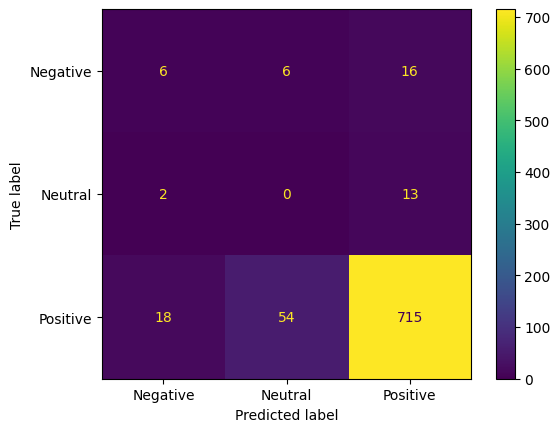

In [ ]:
from sklearn.metrics import accuracy_score
textblob_accuracy = accuracy_score(sample_df['rating'], sample_df['textblob_tag'])
print("Accuracy for TextBlob",textblob_accuracy)

from sklearn.metrics import classification_report
textblob_classification_report = classification_report(sample_df['rating'],sample_df['textblob_tag'])
print(textblob_classification_report)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

textBlob_cm = confusion_matrix(sample_df['rating'], sample_df['textblob_tag'])
disp = ConfusionMatrixDisplay(confusion_matrix=textBlob_cm,display_labels=['Negative','Neutral','Positive'])
disp.plot()


In [ ]:
# Confusion Matrix for Vader

Accuracy for Vader is  0.8951807228915662
              precision    recall  f1-score   support

    Negative       0.46      0.39      0.42        28
     Neutral       0.02      0.07      0.03        15
    Positive       0.97      0.93      0.95       787

    accuracy                           0.90       830
   macro avg       0.48      0.46      0.47       830
weighted avg       0.94      0.90      0.91       830



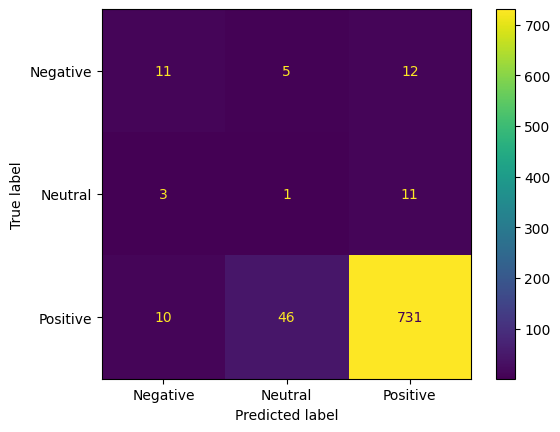

In [ ]:
from sklearn.metrics import accuracy_score
vader_accuracy = accuracy_score(sample_df['rating'],sample_df['vader_tag'])
print("Accuracy for Vader is ",vader_accuracy)

from sklearn.metrics import classification_report
vader_classification_report = classification_report(sample_df['rating'],sample_df['vader_tag'])
print(vader_classification_report)

sample_df.groupby(['vader_tag']).size()

sample_df.groupby(['rating']).size()
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

vader_cm = confusion_matrix(sample_df['rating'], sample_df['vader_tag'])
disp = ConfusionMatrixDisplay(confusion_matrix=vader_cm,display_labels=['Negative','Neutral','Positive'])
disp.plot()


# **Part 2**

In [ ]:
import pandas as pd
data_group2 = pd.read_json('/content/All_Beauty_5.json',lines=True)
print(data_group2.head(5))

   overall  verified   reviewTime      reviewerID        asin  \
0        5      True   09 1, 2016  A3CIUOJXQ5VDQ2  B0000530HU   
1        5      True  11 14, 2013  A3H7T87S984REU  B0000530HU   
2        1      True  08 18, 2013  A3J034YH7UG4KT  B0000530HU   
3        5     False   05 3, 2011  A2UEO5XR3598GI  B0000530HU   
4        5      True   05 6, 2011  A3SFRT223XXWF7  B00006L9LC   

                                               style     reviewerName  \
0  {'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...         Shelly F   
1  {'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...     houserules18   
2  {'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...             Adam   
3  {'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...           Rich K   
4                          {'Size:': ' 200ml/6.7oz'}  C. C. Christian   

                                          reviewText  \
0                   As advertised. Reasonably priced   
1  Like the oder and the feel when I put it on my...   
2 

In [ ]:
def label_data(rating):
    if(rating in [4,5]):
        return 1
    elif(rating == 3):
        return 2
    else:
        return 3
    

In [ ]:
sample_df = data_group2.sample(n=830)

In [ ]:
indices_to_remove = set(sample_df.index)
data_group2 = data_group2[~data_group2.index.isin(indices_to_remove)]


In [ ]:
data_group2['overall'].value_counts().sum()

4439

In [ ]:
data_group2['review_summary'] = data_group2['reviewText'] + ' ' + data_group2['summary']
data_group2['review_summary'] = data_group2['reviewText'].str.cat(data_group2['summary'])
data_group2['review_summary'] = data_group2['review_summary'].fillna('')

In [ ]:
data_group2['overall'] = data_group2['overall'].apply(label_data)

In [ ]:
data_group2['review_summary']

0              As advertised. Reasonably pricedFive Stars
1       Like the oder and the feel when I put it on my...
2       I bought this to smell nice after I shave.  Wh...
3       HEY!! I am an Aqua Velva Man and absolutely lo...
4       If you ever want to feel pampered by a shampoo...
                              ...                        
5262                              Perfect size.Five Stars
5264    I have genetic undereye darkness. Ive accepted...
5265         I absolutely love this eye gel.As advertised
5266    The eye gel is easy to apply and I use it morn...
5268    This is the first eye gel/cream that actually ...
Name: review_summary, Length: 4439, dtype: object

In [ ]:
import re


In [ ]:
data_group2['review_summary'] = data_group2['review_summary'].apply(lambda x: re.sub(r'\$', '', x))
data_group2['review_summary'] = data_group2['review_summary'].str.lower()
data_group2['review_summary'] = data_group2['review_summary'].apply(lambda x: re.sub(r'[\(\)]', '', x))
data_group2['review_summary'] = data_group2['review_summary'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
#sample_df.drop_duplicates(subset=['review_processed_doc_ML'], inplace=True) 

In [ ]:


from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
bow_rep_tfidf = tfidf.fit_transform(data_group2['review_summary'])

In [ ]:
bow_rep_tfidf.shape

(4439, 5000)

In [ ]:
type(bow_rep_tfidf)

scipy.sparse._csr.csr_matrix

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE

X = bow_rep_tfidf
y = data_group2['overall']

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

counter = Counter(y)
print(counter)

Counter({1: 4196, 3: 4196, 2: 4196})


In [ ]:
type(counter)

collections.Counter

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)


In [ ]:

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8811, 5000)
(3777, 5000)
(8811,)
(3777,)


In [ ]:
print(X_train)

  (0, 3282)	0.27717236972594367
  (0, 2401)	0.2632327887799581
  (0, 429)	0.31513303166725903
  (0, 2033)	0.22898463504539163
  (0, 2423)	0.2632327887799581
  (0, 3281)	0.21771879606565378
  (0, 141)	0.27717236972594367
  (0, 391)	0.13795664961678292
  (0, 1759)	0.19242846765769275
  (0, 2494)	0.18835023113782848
  (0, 1682)	0.15446780571637742
  (0, 1040)	0.22566857600303086
  (0, 1702)	0.18123071188395803
  (0, 4877)	0.13464059057442215
  (0, 763)	0.15820264139417542
  (0, 3915)	0.13265301799305776
  (0, 3206)	0.10084861802557002
  (0, 4866)	0.19655599463135356
  (0, 3654)	0.13626545065574566
  (0, 4762)	0.11837730034278886
  (0, 2477)	0.1761095560864954
  (0, 2177)	0.0831470122680397
  (0, 1656)	0.1746727438532881
  (0, 4415)	0.0693682909794342
  (0, 2855)	0.0919343238803669
  :	:
  (8810, 1964)	0.10663710119785545
  (8810, 1966)	0.13456858559014093
  (8810, 2201)	0.12568257846623546
  (8810, 1937)	0.1116455674392054
  (8810, 2520)	0.09433915228417615
  (8810, 4782)	0.09660341876708

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

#import different metrics to evaluate the classifiers
from sklearn.metrics import accuracy_score
#from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn import metrics


In [ ]:
nb = MultinomialNB() #instantiate a Multinomial Naive Bayes model
nb.fit(X_train, y_train)#train the model(timing it with an IPython "magic command")
y_pred_class = nb.predict(X_test)#make class predictions for X_test

In [ ]:
from sklearn.metrics import accuracy_score
nb_accuracy = accuracy_score(y_test,y_pred_class)
print(nb_accuracy)

0.9851734180566587


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_class))


              precision    recall  f1-score   support

           1       1.00      0.97      0.98      1259
           2       0.97      1.00      0.98      1259
           3       0.99      0.99      0.99      1259

    accuracy                           0.99      3777
   macro avg       0.99      0.99      0.99      3777
weighted avg       0.99      0.99      0.99      3777



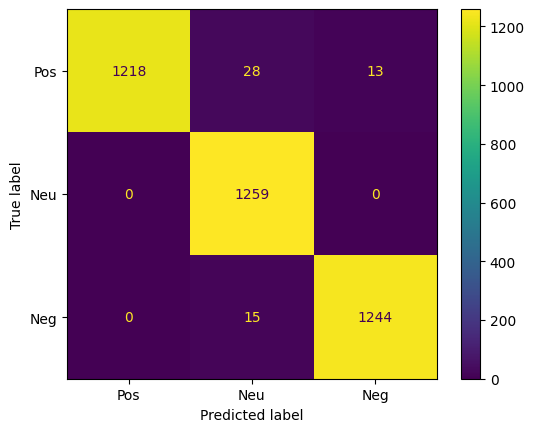

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Pos','Neu','Neg'])
disp.plot()

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)#train the model(timing it with an IPython "magic command")
y_pred_class1 = lr.predict(X_test)

In [ ]:
lr_accuracy = accuracy_score(y_test,y_pred_class1)
print(lr_accuracy)

0.9944400317712471


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_class1))

              precision    recall  f1-score   support

           1       1.00      0.99      0.99      1259
           2       0.99      1.00      0.99      1259
           3       1.00      1.00      1.00      1259

    accuracy                           0.99      3777
   macro avg       0.99      0.99      0.99      3777
weighted avg       0.99      0.99      0.99      3777



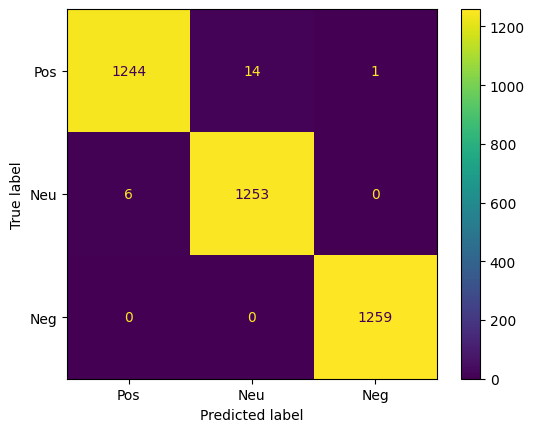

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_class1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Pos','Neu','Neg'])
disp.plot()

In [ ]:
def get_recommendations(review_text, df, model, vect):
    """
    Returns top recommended products based on user's input review text.

    Parameters:
    review_text (str): The user's input review text.
    df (pandas dataframe): The dataframe containing the product information.
    model: The trained model for making recommendations.
    vect: The trained vectorizer for feature extraction.

    Returns:
    recommended_products (list): A list of recommended products.
    """
     # Convert the string to lowercase
    review_features = tfidf.fit_transform(data_group2['review_summary']) # Apply the lowercased string to the TF-IDF vectorizer


    # Get predicted ratings for all products
    predicted_ratings = model.predict(review_features)
    # Create dataframe of product ratings and names
    product_ratings = pd.DataFrame({'rating': predicted_ratings, 'product_name': data_group2['asin']})

    # Sort products by predicted rating in descending order
    sorted_products = product_ratings.sort_values(by='rating', ascending=False)

    # Get top 5 recommended products
    recommended_products = sorted_products.head(5)['asin'].tolist()

    return recommended_products



recommendations = get_recommendations('B0000530HU', data_group2, nb, tfidf)
print(recommendations)


In [ ]:
import pandas as pd

# Define the confusion matrices
confusion_matrix1SUP = [[25, 4],
                     [24, 23]]

confusion_matrix2STOM = [[76, 0],
                         [0, 0]]

confusion_matrix3UNSUP = [[6, 4],
                     [3, 13]]

# Convert the confusion matrices to dataframes
confusion_matrix1_df = pd.DataFrame(confusion_matrix1SUP, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
confusion_matrix2_df = pd.DataFrame(confusion_matrix2STOM, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
confusion_matrix3_df = pd.DataFrame(confusion_matrix3UNSUP, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

# Concatenate the dataframes horizontally
concatenated_confusion_matrix = pd.concat([confusion_matrix1_df, confusion_matrix2_df, confusion_matrix3_df], axis=1, keys=['Supervised Learning', 'STOM Model', 'Unsupervised Learning'])

# Display the concatenated confusion matrix
print(concatenated_confusion_matrix)

         Supervised Learning              STOM Model              \
                 Predicted 0 Predicted 1 Predicted 0 Predicted 1   
Actual 0                  25           4          76           0   
Actual 1                  24          23           0           0   

         Unsupervised Learning              
                   Predicted 0 Predicted 1  
Actual 0                     6           4  
Actual 1                     3          13  
